<a href="https://colab.research.google.com/github/R1ng1/Deep_Learning_Lab-/blob/main/Deep_Learning_Lab_3_24040208004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MDSC-302 | ASSIGNMENT - 3

### Name:  Muthangi Sri Ranga Sai


### Reg.no: 24040208004

### Subject: Deep Learning Practicals

### Question 1:





1 Take several pictures of red, blue, and green items with your phone or other dig-
ital camera (or download some from the internet, if a camera isn’t available).



*   Load each image, and convert it to a tensor.
*   For each image tensor, use the .mean() method to get a sense of how bright
the image is.

*   Take the mean of each channel of your images. Can you identify the red,
green, and blue items from only the channel averages?







In [1]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

In [19]:
# my images
image_paths = [
    "/content/1.jpg",
"/content/1-10copies.jpg",
    "/content/2.JPG",
    "/content/bala97.jpg",
    "/content/GTC Azure Desktop Dynamic.jpg",
    "/content/photo-1528501028382-e587fcf3a03e.jpg",
    "/content/photo-1614200179396-2bdb77ebf81b.jpg"
]

In [20]:
# Transformation to tensor
to_tensor = transforms.ToTensor()


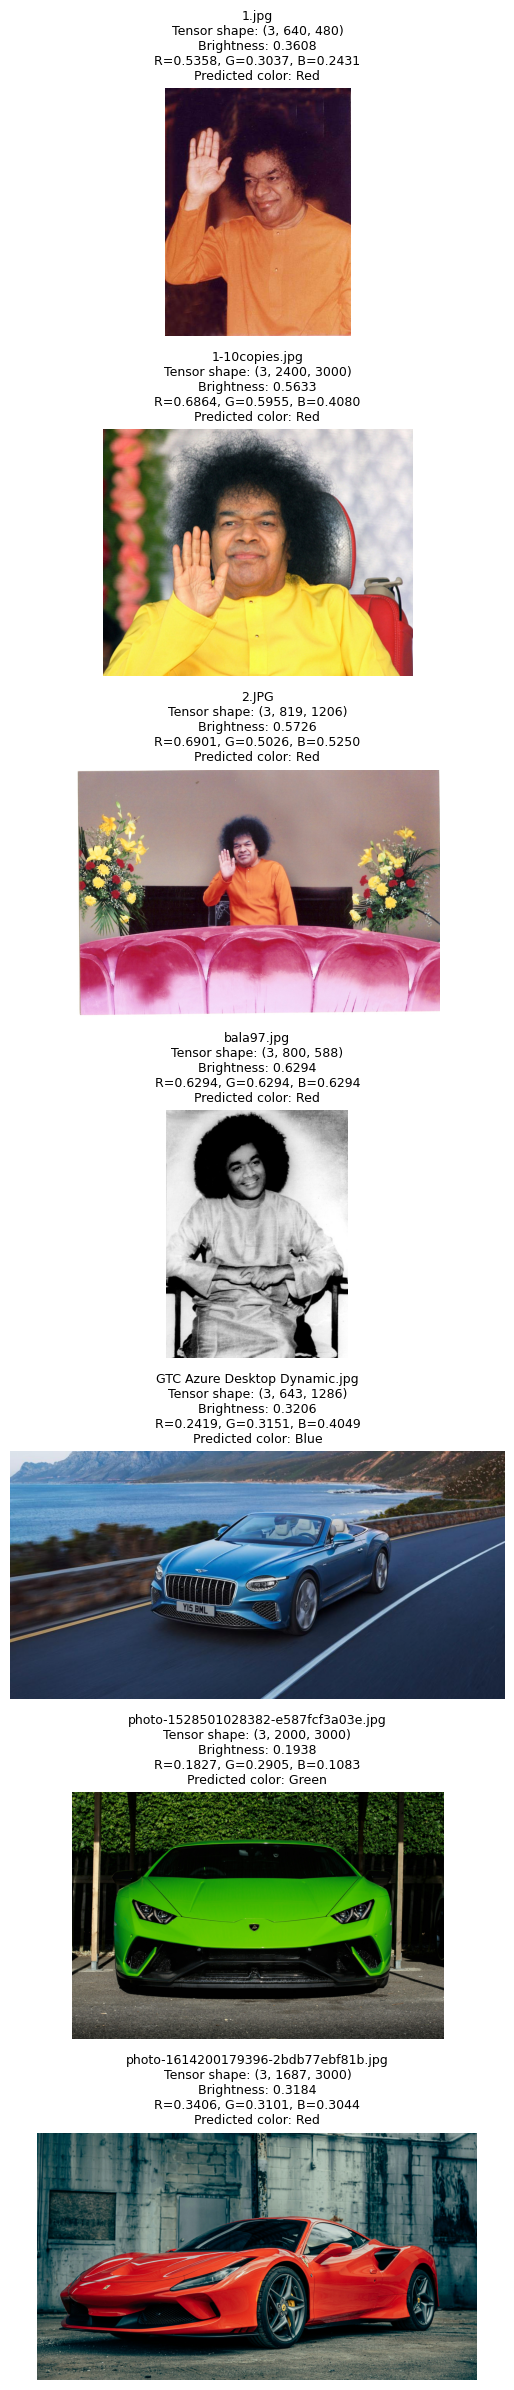

In [21]:
# Create vertical subplots
fig, axes = plt.subplots(len(image_paths), 1, figsize=(12, 24))

for i, path in enumerate(image_paths):
    # Load and convert to tensor
    img = Image.open(path).convert("RGB")
    tensor_img = to_tensor(img)

    # Brightness
    brightness = tensor_img.mean().item()

    # Channel means
    r_mean = tensor_img[0].mean().item()
    g_mean = tensor_img[1].mean().item()
    b_mean = tensor_img[2].mean().item()

    # Identify dominant channel
    means = [r_mean, g_mean, b_mean]
    dominant_idx = means.index(max(means))
    color_map = {0: "Red", 1: "Green", 2: "Blue"}
    predicted_color = color_map[dominant_idx]

    # Display in subplot
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(
        f"{path.split('/')[-1]}\n"
        f"Tensor shape: {tuple(tensor_img.shape)}\n"
        f"Brightness: {brightness:.4f}\n"
        f"R={r_mean:.4f}, G={g_mean:.4f}, B={b_mean:.4f}\n"
        f"Predicted color: {predicted_color}",
        fontsize=9
    )

plt.tight_layout()
plt.show()

### Question 2 :

2.) Select a relatively large file containing Python source code.


*  Build an index of all the words in the source file (feel free to make your tokenization as simple or as complex as you like; we suggest starting with replac-
ing r"[^a-zA-Z0-9_]+" with spaces).

*   Compare your index with the one we made for FashionMNIST. Which is
larger?\
*   Create the one-hot encoding for the source code file.
*   What information is lost with this encoding? How does that information compare to what’s lost in the FashionMNIST encoding?





In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms

# 1. Data Preprocessing

In [24]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = FashionMNIST(root="./train_fashion/", train=True, download=True, transform=transform)
test_data = FashionMNIST(root="./test_fashion/", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

classes = train_data.classes  # ['T-shirt/top', 'Trouser', 'Pullover', ... 'Ankle boot']

# 2. CNN Model Definition

In [25]:
class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))   # (32,14,14)
        x = self.pool(torch.relu(self.conv2(x)))   # (64,7,7)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# 3. Training Setup

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FashionCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Training Loop

In [27]:
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_accuracy = 100 * correct / total
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f} - Train Accuracy: {train_accuracy:.2f}%")

print("Training Finished!")


Epoch [1/10] - Loss: 0.5380 - Train Accuracy: 80.53%
Epoch [2/10] - Loss: 0.3562 - Train Accuracy: 87.16%
Epoch [3/10] - Loss: 0.3021 - Train Accuracy: 89.18%
Epoch [4/10] - Loss: 0.2680 - Train Accuracy: 90.26%
Epoch [5/10] - Loss: 0.2445 - Train Accuracy: 91.07%
Epoch [6/10] - Loss: 0.2231 - Train Accuracy: 91.86%
Epoch [7/10] - Loss: 0.2099 - Train Accuracy: 92.29%
Epoch [8/10] - Loss: 0.1943 - Train Accuracy: 92.81%
Epoch [9/10] - Loss: 0.1823 - Train Accuracy: 93.33%
Epoch [10/10] - Loss: 0.1678 - Train Accuracy: 93.76%
Training Finished!


# 5. Evaluation

In [28]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"\nFinal Test Accuracy on FashionMNIST: {test_accuracy:.2f}%")



Final Test Accuracy on FashionMNIST: 92.04%
